<a href="https://colab.research.google.com/github/ColdCoffee21/Foundations-of-Data-Science/blob/master/eval_Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import packages

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

## Import given dataset named 'dataset1.csv'

In [ ]:
# https://raw.githubusercontent.com/dhanyahari07/Data_Science/master/dataset1.csv

In [ ]:
def read_data():
    # Write your code here
    data = pd.read_csv('https://raw.githubusercontent.com/dhanyahari07/Data_Science/master/dataset1.csv',sep=",",encoding ="utf-16")
    number_of_rows= data.shape[0]
    number_of_columns = data.shape[1]
    return data, number_of_rows, number_of_columns
read_data()

(      X    Y
 0    17   78
 1    76  104
 2    81  179
 3   100  243
 4    37   24
 ..  ...  ...
 95   91  131
 96   85  160
 97    5   -9
 98   38   84
 99   98  147
 
 [100 rows x 2 columns], 100, 2)

## Split dataset into variable components

In [ ]:
def X_Y_split():
    data,number_of_rows,number_of_columns = read_data()
    X = data['X'].values
    Y = data['Y'].values
    return X, Y
X_Y_split()

(array([ 17,  76,  81, 100,  37,   3,  59,  76,  25,   9,  32,  34,  66,
         70,  86,  70,  43,  19,  26,  31,  34,  21,  66,  61,  30,  13,
         45,  24,  30,  56,  24,  17,  17,  91,   5,  90,  65,  26,  71,
         12,  26,  22,  62,  73, 100,  34,  68,  67,   3,  92,  43,  54,
         78,  74,  80,  65,  75,  30,  22,  31,  74,  74,  48,  96,  51,
         11,   1,  75,   1,  38,   1,  26,  99,  53,  15,  90,  39,  81,
         10,  83,   3,  69,  50,  94,  33,  70,  49,  30,  84,  17,   4,
          3,  82,  56,  85,  91,  85,   5,  38,  98]),
 array([ 78, 104, 179, 243,  24,  58,  59, 171,  98,  47,  54,  21, 185,
        187, 228, 116, 103,  10,  83, 119,  86,  52, 117,  64,  37,  84,
         58,  88, 114, 100,  -5,  82,  43, 187,   3, 168, 177,  89, 194,
        -11,  -1,  82,  71,  88, 224, 113, 185,  99,  25, 175,  90, 159,
        131, 124, 202, 124, 155,  72,  38,  95, 125, 193, 102, 196, 161,
         68,  57, 206, -26, 123, -21,  41, 206, 158,  12, 137,  29, 1

## Calculate coefficients

In [ ]:
def coefficients():
    X, Y = X_Y_split()
    mean_x = np.mean(X)
    mean_y = np.mean(Y)
    n = len(X)

    numer = 0
    denom  = 0
    for i in range(n):
      numer+=(X[i]-mean_x) *(Y[i]-mean_y)
      denom+=(X[i]-mean_x) **2 
    b1 = numer/denom
    b0 = mean_y-(b1 * mean_x)
    #write your coe here
    # Return coefficients
    return round(b1,3), round(b0,3)
coefficients()

(1.819, 12.509)

## Plot the values along with the regression line

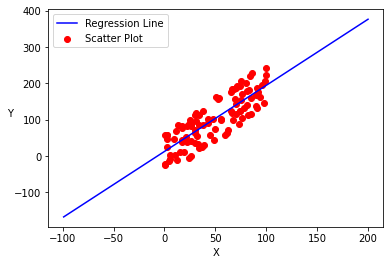

In [ ]:
def plot():
    # Write your code here
    X, Y = X_Y_split()
    b1,b0 = coefficients()
    
    # Calculating line values x and y
    max_x = np.max(X) + 100
    min_x = np.min(X) - 100
    x = np.linspace(min_x, max_x, 1000) # Returns number spaces evenly w.r.t interval
    y = b0 + b1 * x

    # Ploting Line
    plt.plot(x, y, color='b', label='Regression Line')

    # Ploting Scatter Points
    plt.scatter(X, Y, c='r', label='Scatter Plot')
    plt.xlabel('X')
    plt.ylabel('Y',rotation=0)
    plt.legend();
    plt.show()
plot()

## Compute the RMSE value

In [ ]:
def rmse():
    data,n,m = read_data()
    b1, b0 = coefficients()
    X, Y = X_Y_split()
    y_pred=b0+b1*X
    rmse=np.sum(np.square(y_pred-Y))
    rmse=np.sqrt((rmse/n))
    # Write your code here
    return round(rmse,3)
rmse()

36.342

## Compute the R^2 score

In [ ]:
def r2():
    _,n,_ = read_data()
    b1, b0 = coefficients()
    X, Y = X_Y_split()
    # write your code here
    mean_x = np.mean(X)
    mean_y = np.mean(Y)
    ss_tot = 0
    ss_res = 0
    for i in range(n):
      y_pred = b0 + b1* X[i]
      ss_tot += (Y[i]- mean_y) **2
      ss_res += (Y[i]- y_pred) **2
    r2 = 1 - (ss_res/ss_tot)
    return round(r2,3)
r2()

0.69

## Compare with values computed using sklearn

In [ ]:
def compare_rmse():
    _,n,_ = read_data()
    X, Y = X_Y_split()
    old_rmse = rmse()
    old_r2 = r2()

    # Write your code here
    X = X.reshape((n,1))
    reg = LinearRegression()
    reg = reg.fit(X,Y)
    Y_pred = reg.predict(X)
    mse = mean_squared_error(Y,Y_pred)
    s_rmse = np.sqrt(mse)
    s_r2 = reg.score(X,Y)
    return round(abs(old_rmse-s_rmse),3), round(abs(old_r2-s_r2),3)
compare_rmse()

(0.0, 0.0)